In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.float_format = '{:,.3f}'.format

%matplotlib inline

In [2]:
#! pip install yellowbrick

In [3]:
import yellowbrick.features as yft

In [4]:
data = pd.read_csv('winequality_clean.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6457 entries, 0 to 6456
Data columns (total 13 columns):
type                    6457 non-null object
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 655.9+ KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"6,457.000","6,457.000","6,457.000","6,457.000","6,457.000","6,457.000","6,457.000","6,457.000","6,457.000","6,457.000","6,457.000","6,457.000"
mean,7.219,0.340,0.319,5.446,0.056,30.496,115.691,1.715,3.219,0.531,10.489,5.817
std,1.295,0.165,0.146,4.764,0.035,17.757,56.595,7.659,0.161,0.149,1.193,0.874
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,103.898,4.010,2.000,14.900,9.000


## Variável Resposta

In [7]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

Segundo o enunciado, os possíveis valores de `quality` estariam entre 0 e 10, porém, nossos dados apresentam apenas valores entre 3 e 9. Isso descarta a possibilidade de utilizar um modelo de classificação multiclasse, pois não seria possível modelar as classes não observadas.

Logo, creio que a melhor abordagem seja modelar este problema como um de regressão, com a variável quality como dependente e posteriormente 'arredondar ' a nota para chegar a um valor inteiro

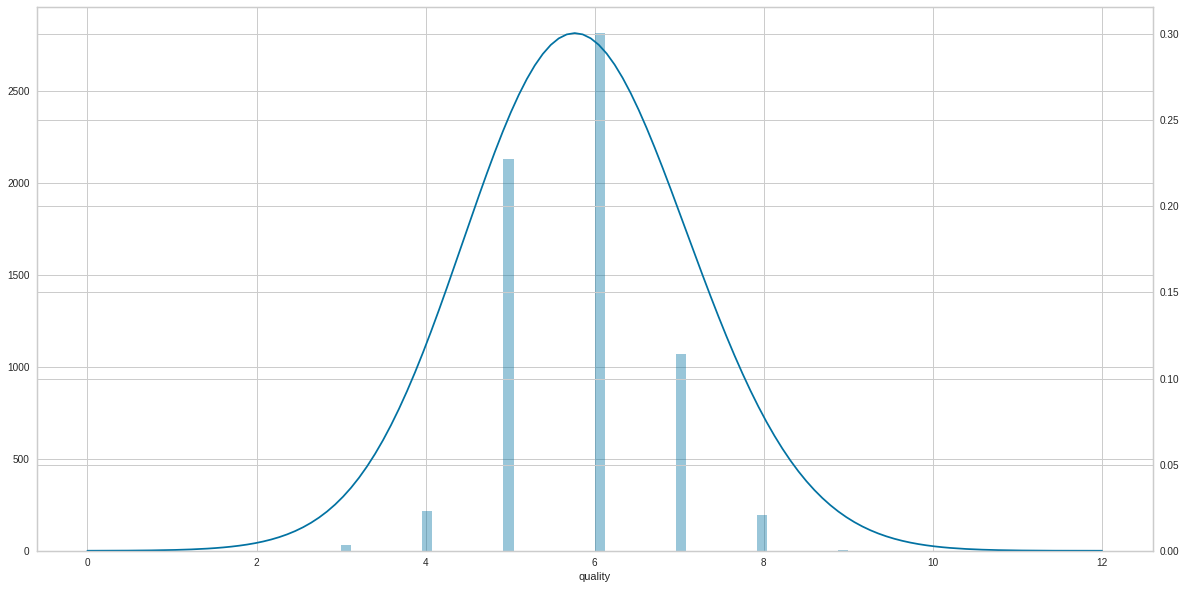

In [8]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()


sns.distplot(data['quality'], kde=False, ax=ax1)
sns.distplot(data['quality'], hist=False, ax=ax2, kde_kws={'bw':1});

Podemos notar uma concentração nas notas 5, 6, e 7. 

## Variáveis Explicativas

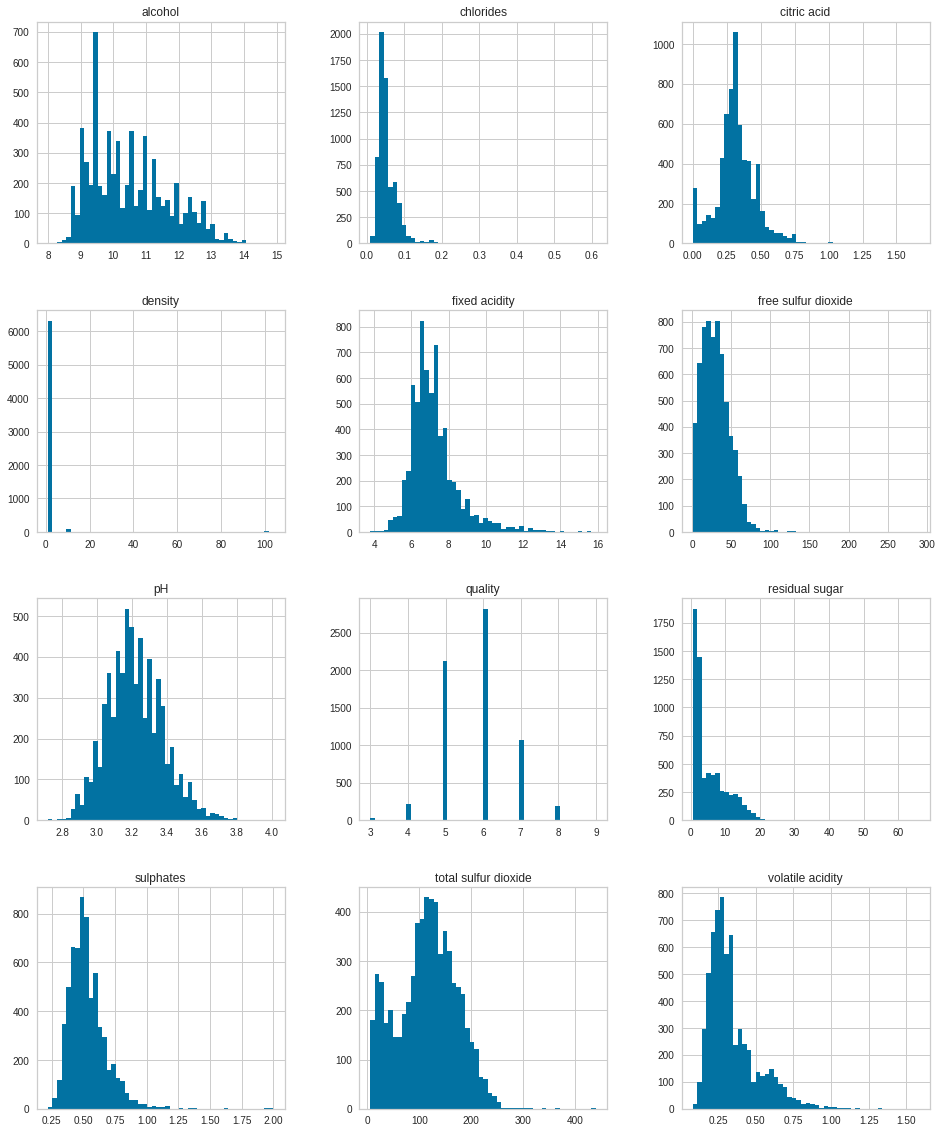

In [9]:
numéricas = data.select_dtypes(include = ['float64', 'int64'])
numéricas.hist(figsize=(16, 20), bins=50);

Podemos notar que algumas variáveis, como `density` e `residual sugar` contém valores que estão distantes do resto da distribuição. Investigaremos estes casos mais adiante 

In [10]:
corr = numéricas.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,0.219,0.325,-0.112,0.297,-0.281,-0.328,0.160,-0.252,0.302,-0.094,-0.077
volatile acidity,0.219,1.000,-0.378,-0.196,0.377,-0.353,-0.415,0.031,0.261,0.226,-0.037,-0.267
citric acid,0.325,-0.378,1.000,0.141,0.039,0.134,0.196,0.058,-0.329,0.056,-0.009,0.086
residual sugar,-0.112,-0.196,0.141,1.000,-0.129,0.403,0.496,0.176,-0.267,-0.186,-0.360,-0.038
chlorides,0.297,0.377,0.039,-0.129,1.000,-0.194,-0.280,0.062,0.045,0.397,-0.256,-0.200
free sulfur dioxide,-0.281,-0.353,0.134,0.403,-0.194,1.000,0.721,0.030,-0.146,-0.188,-0.180,0.055
total sulfur dioxide,-0.328,-0.415,0.196,0.496,-0.280,0.721,1.000,0.031,-0.239,-0.275,-0.266,-0.041
density,0.160,0.031,0.058,0.176,0.062,0.030,0.031,1.000,-0.053,0.063,-0.080,-0.029
pH,-0.252,0.261,-0.329,-0.267,0.045,-0.146,-0.239,-0.053,1.000,0.191,0.122,0.020
sulphates,0.302,0.226,0.056,-0.186,0.397,-0.188,-0.275,0.063,0.191,1.000,-0.004,0.037


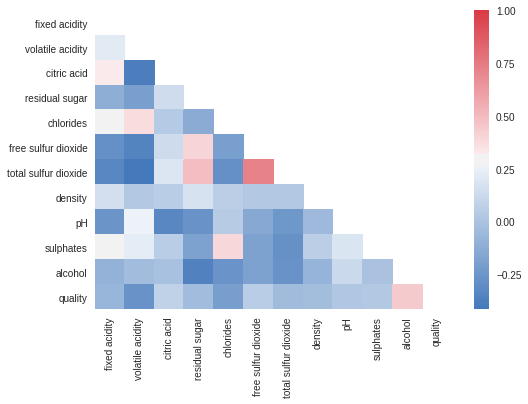

In [11]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, mask = mask);

Com a exceção de `free sulfur dioxide` e `total sulfur dioxide` não notamos correlações muito acentuadas

/opt/conda/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


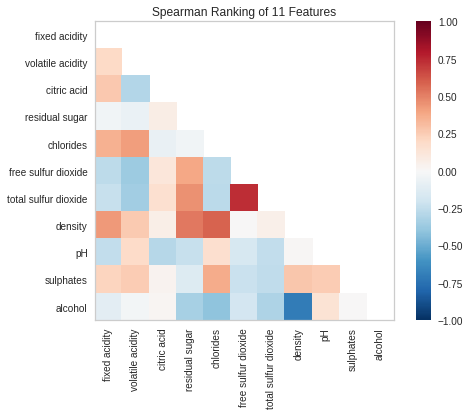

In [12]:
#Vamos utilizar a bilbioteca yellowbrick para visualizar a correlação de spearman

features = [col for col in data.select_dtypes(include =['float64']).columns]


X = data[features]
y = data['quality']


vis = yft.Rank2D(features=features, algorithm='spearman')

vis.fit(X, y)
vis.transform(X)
vis.poof()

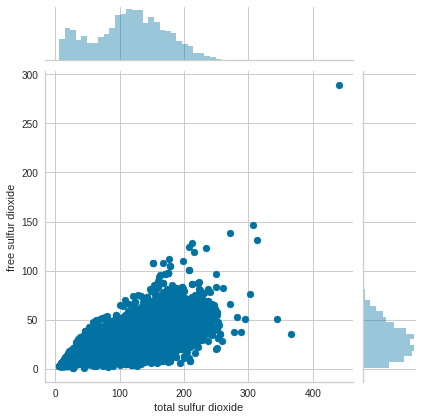

In [13]:
sns.jointplot(x="total sulfur dioxide", y="free sulfur dioxide", data=numéricas);

In [14]:
numéricas['calc_bound_sulfur_dioxide'] = numéricas['total sulfur dioxide'] - numéricas['free sulfur dioxide']

In [15]:
corr = numéricas.corr()

corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calc_bound_sulfur_dioxide
fixed acidity,1.000,0.219,0.325,-0.112,0.297,-0.281,-0.328,0.160,-0.252,0.302,-0.094,-0.077,-0.299
volatile acidity,0.219,1.000,-0.378,-0.196,0.377,-0.353,-0.415,0.031,0.261,0.226,-0.037,-0.267,-0.379
citric acid,0.325,-0.378,1.000,0.141,0.039,0.134,0.196,0.058,-0.329,0.056,-0.009,0.086,0.191
residual sugar,-0.112,-0.196,0.141,1.000,-0.129,0.403,0.496,0.176,-0.267,-0.186,-0.360,-0.038,0.460
chlorides,0.297,0.377,0.039,-0.129,1.000,-0.194,-0.280,0.062,0.045,0.397,-0.256,-0.200,-0.272
free sulfur dioxide,-0.281,-0.353,0.134,0.403,-0.194,1.000,0.721,0.030,-0.146,-0.188,-0.180,0.055,0.507
total sulfur dioxide,-0.328,-0.415,0.196,0.496,-0.280,0.721,1.000,0.031,-0.239,-0.275,-0.266,-0.041,0.963
density,0.160,0.031,0.058,0.176,0.062,0.030,0.031,1.000,-0.053,0.063,-0.080,-0.029,0.027
pH,-0.252,0.261,-0.329,-0.267,0.045,-0.146,-0.239,-0.053,1.000,0.191,0.122,0.020,-0.241
sulphates,0.302,0.226,0.056,-0.186,0.397,-0.188,-0.275,0.063,0.191,1.000,-0.004,0.037,-0.269


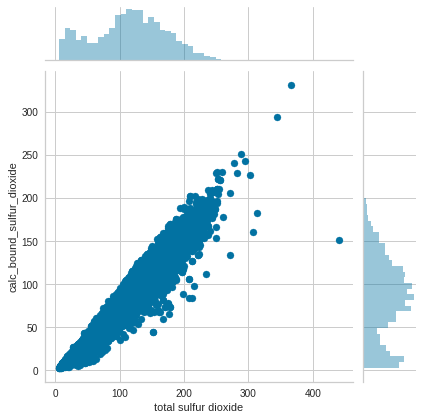

In [16]:
sns.jointplot(x="total sulfur dioxide", y="calc_bound_sulfur_dioxide", data=numéricas);

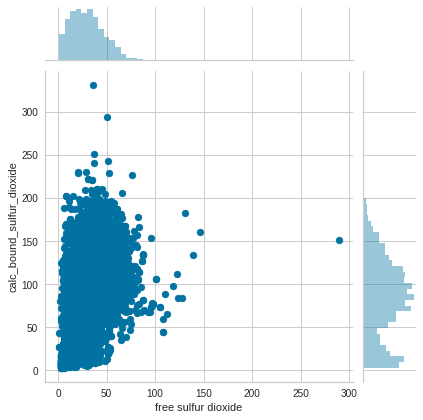

In [17]:
sns.jointplot(x="free sulfur dioxide", y="calc_bound_sulfur_dioxide", data=numéricas);

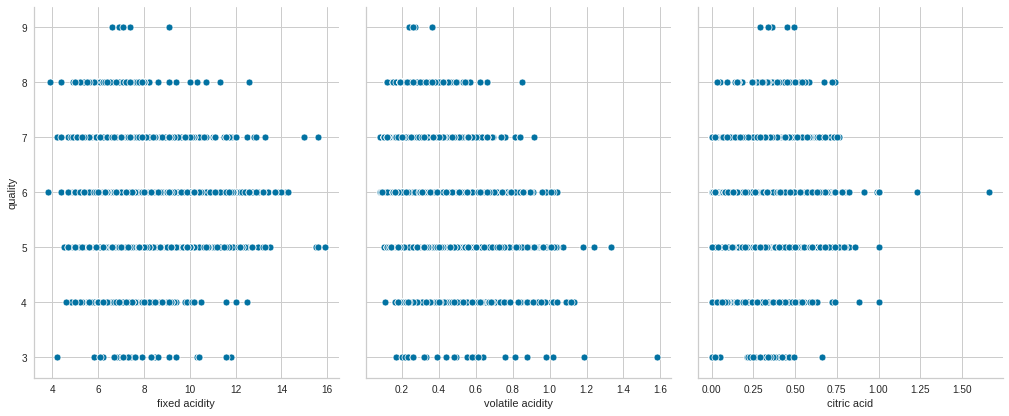

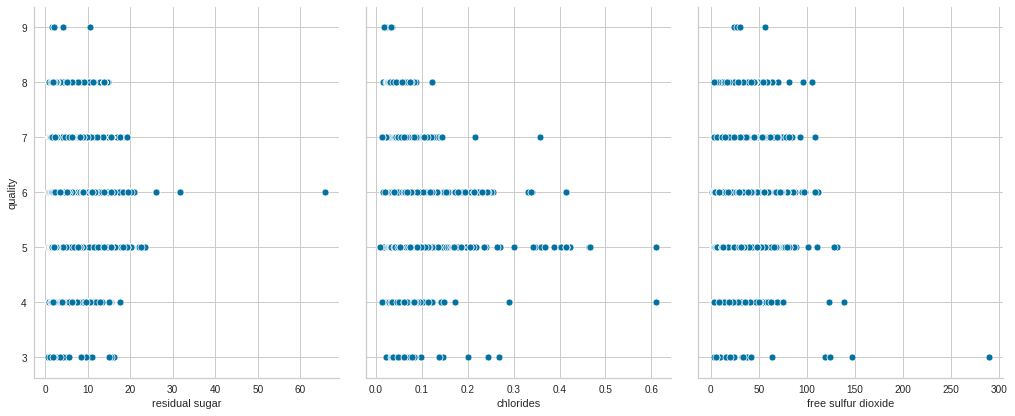

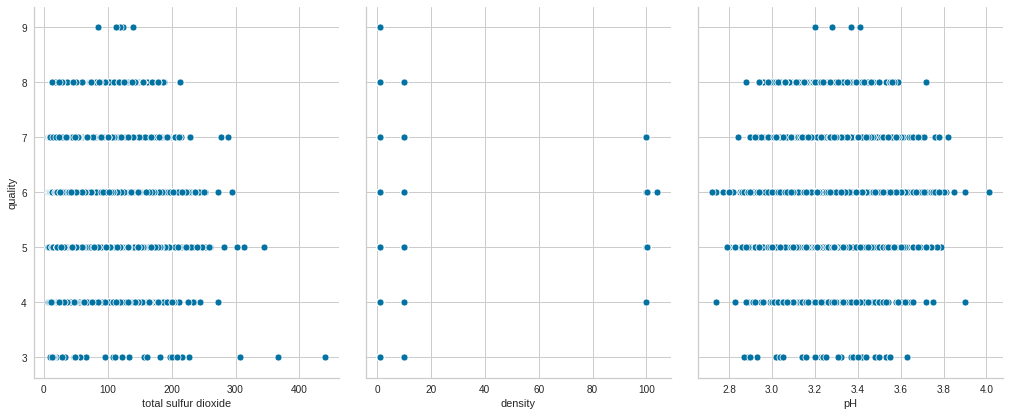

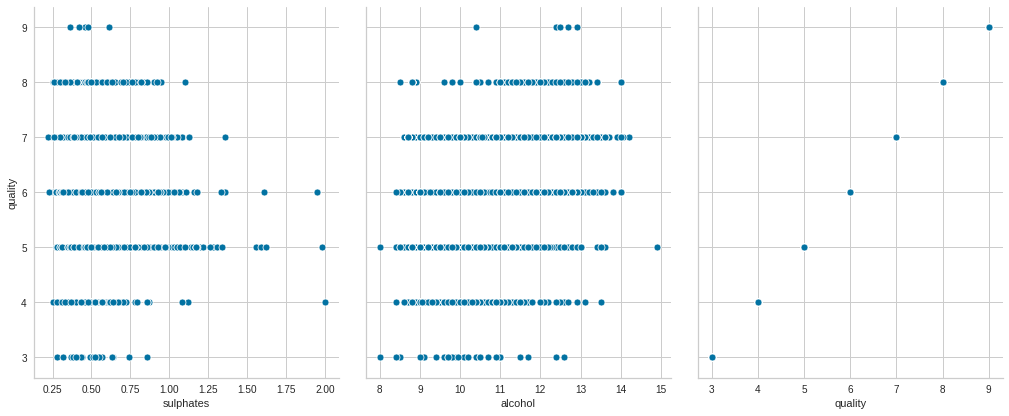

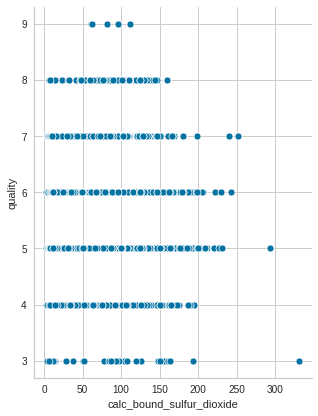

In [18]:
plt.rcParams['figure.figsize']=(20,10)

for i in range(0, len(numéricas.columns), 3):
    sns.pairplot(data=numéricas,
                x_vars=numéricas.columns[i:i+3],
                y_vars=['quality'], 
                height=6, aspect=0.8)

Não podemos observar relações muito diretas entre as variáveis explicativas e as dependentes. Vamos agora verificar se separando os dados pelo tipo de vinho (`type`) termeos resultados mais interessantes

In [19]:
data['type'].unique()

array(['White', 'Red'], dtype=object)

In [20]:
white_data = data.query("type == 'White'").select_dtypes(include = ['float64', 'int64']).copy()
red_data = data.query("type == 'Red'").select_dtypes(include = ['float64', 'int64']).copy()

In [21]:
white_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"4,864.000","4,864.000","4,864.000","4,864.000","4,864.000","4,864.000","4,864.000","4,864.000","4,864.000","4,864.000","4,864.000","4,864.000"
mean,6.859,0.278,0.334,6.398,0.046,35.284,138.387,1.552,3.188,0.490,10.511,5.877
std,0.843,0.101,0.121,5.080,0.022,17.023,42.543,6.862,0.151,0.114,1.232,0.887
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.087,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,103.898,3.820,1.080,14.200,9.000


In [22]:
red_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,593.000","1,593.000","1,593.000","1,593.000","1,593.000","1,593.000","1,593.000","1,593.000","1,593.000","1,593.000","1,593.000","1,593.000"
mean,8.320,0.527,0.271,2.538,0.088,15.876,46.392,2.213,3.311,0.658,10.422,5.634
std,1.738,0.179,0.195,1.410,0.047,10.467,32.885,9.682,0.154,0.170,1.064,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,100.369,4.010,2.000,14.900,8.000


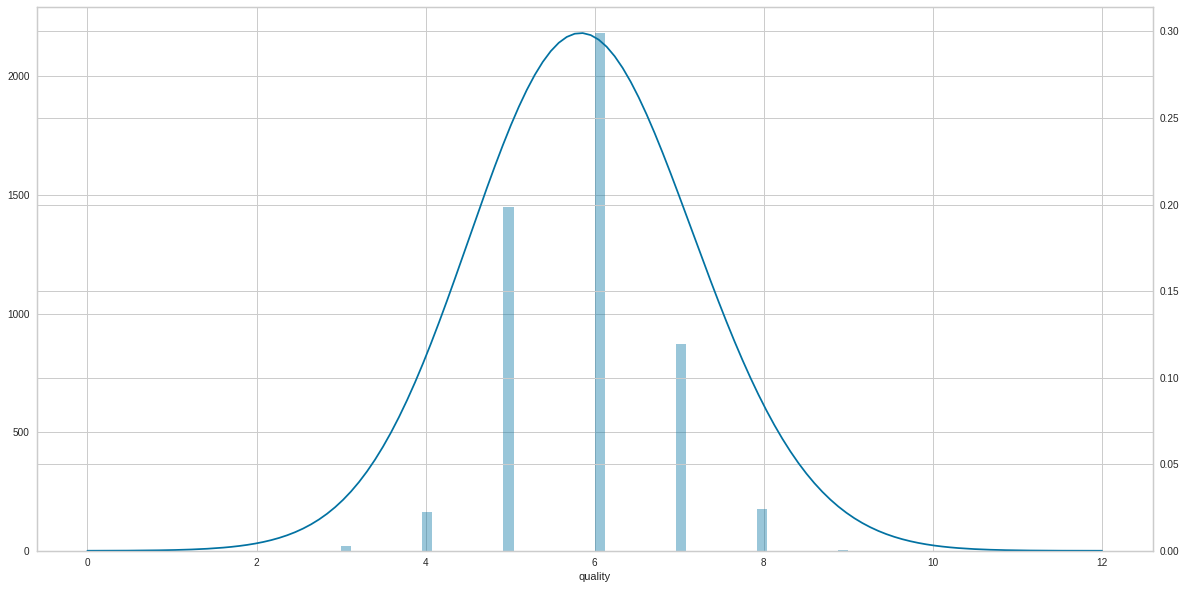

In [23]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()


sns.distplot(white_data['quality'], kde=False, ax=ax1)
sns.distplot(white_data['quality'], hist=False, ax=ax2, kde_kws={'bw':1});

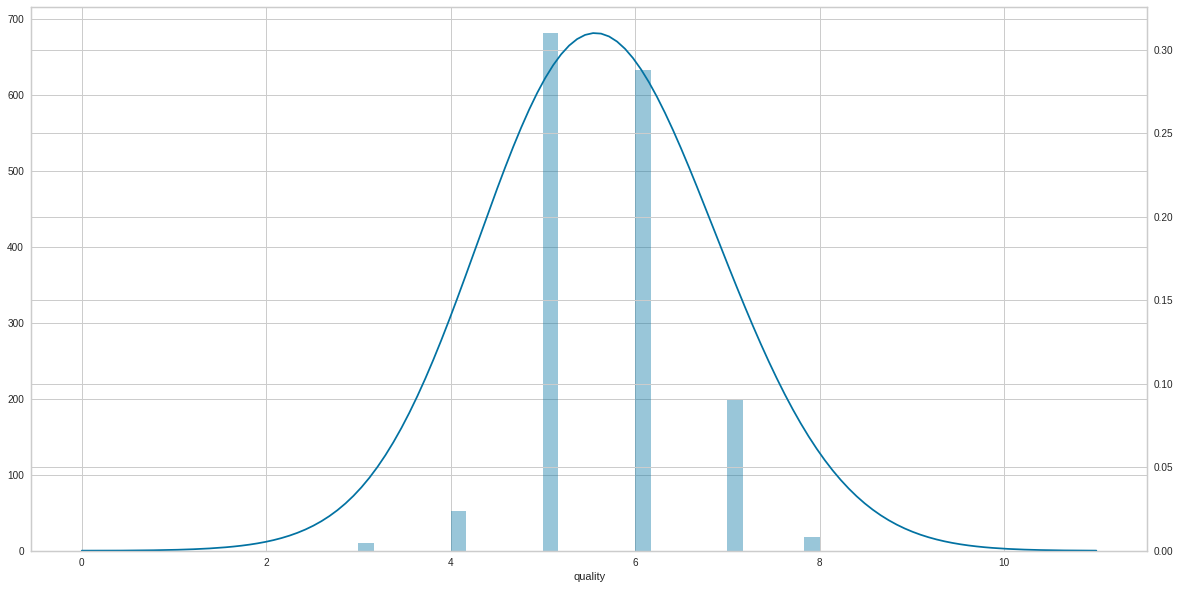

In [24]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()


sns.distplot(red_data['quality'], kde=False, ax=ax1)
sns.distplot(red_data['quality'], hist=False, ax=ax2, kde_kws={'bw':1});

### Vinho Branco

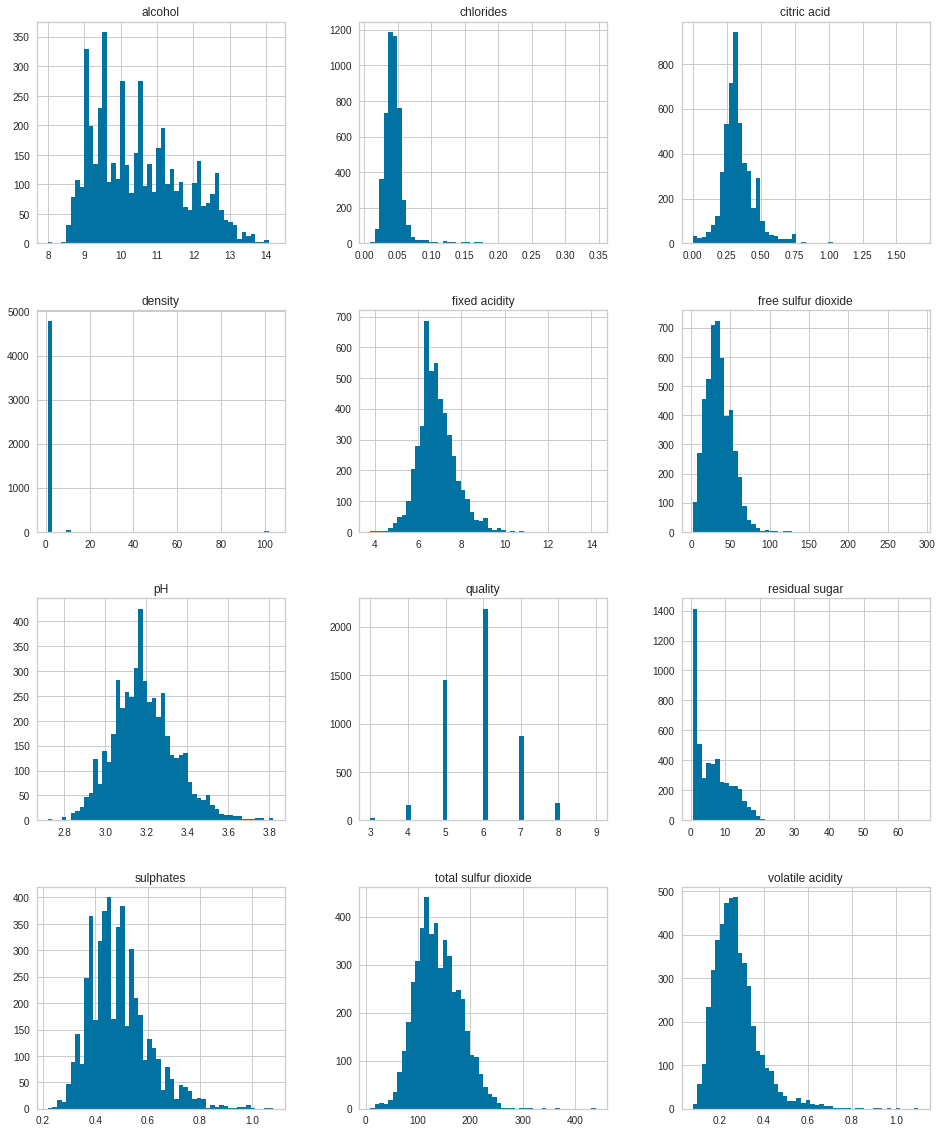

In [25]:
white_data.hist(figsize=(16, 20), bins=50);

In [26]:
corrw = white_data.corr()
corrw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.022,0.289,0.088,0.022,-0.048,0.091,0.073,-0.425,-0.015,-0.120,-0.115
volatile acidity,-0.022,1.000,-0.149,0.065,0.071,-0.099,0.088,0.012,-0.033,-0.035,0.067,-0.196
citric acid,0.289,-0.149,1.000,0.092,0.114,0.094,0.121,0.050,-0.163,0.061,-0.074,-0.010
residual sugar,0.088,0.065,0.092,1.000,0.088,0.300,0.402,0.224,-0.193,-0.026,-0.451,-0.099
chlorides,0.022,0.071,0.114,0.088,1.000,0.102,0.198,0.027,-0.090,0.018,-0.360,-0.209
free sulfur dioxide,-0.048,-0.099,0.094,0.300,0.102,1.000,0.616,0.047,-0.001,0.060,-0.250,0.008
total sulfur dioxide,0.091,0.088,0.121,0.402,0.198,0.616,1.000,0.099,0.002,0.138,-0.448,-0.174
density,0.073,0.012,0.050,0.224,0.027,0.047,0.099,1.000,-0.044,0.054,-0.089,-0.026
pH,-0.425,-0.033,-0.163,-0.193,-0.090,-0.001,0.002,-0.044,1.000,0.156,0.123,0.101
sulphates,-0.015,-0.035,0.061,-0.026,0.018,0.060,0.138,0.054,0.156,1.000,-0.020,0.053


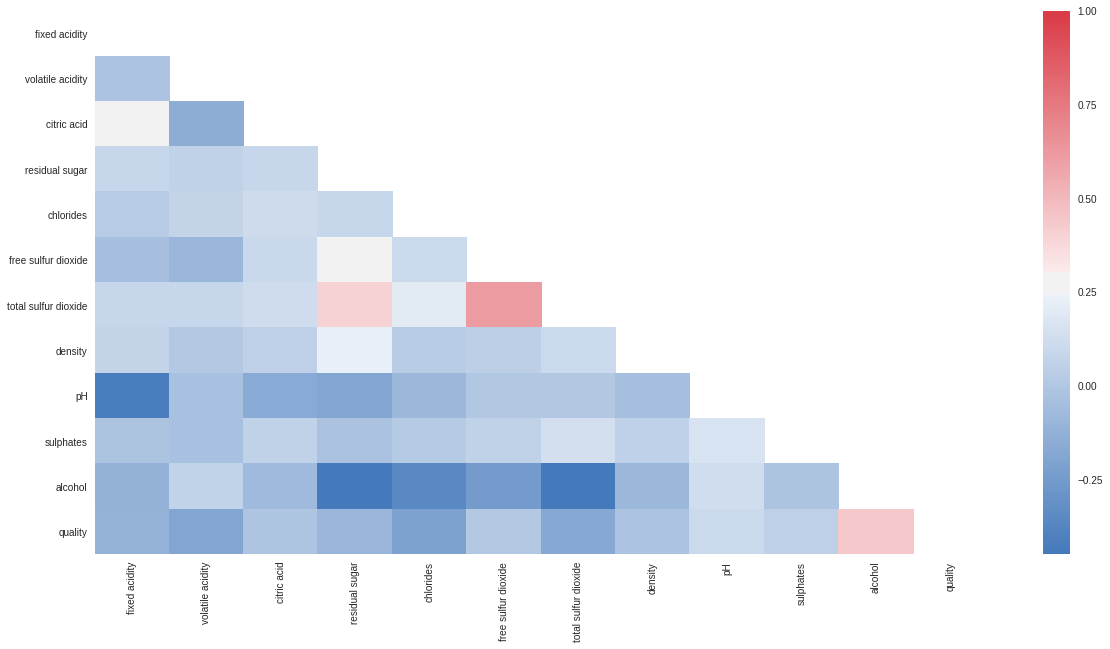

In [27]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)

mask = np.zeros_like(corrw, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corrw, cmap=cmap, mask = mask);

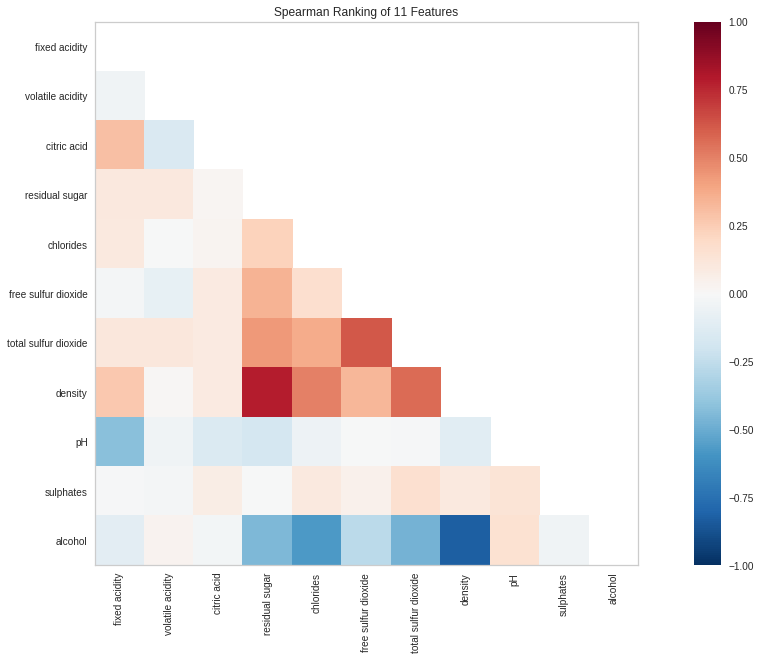

In [28]:
X = white_data[features]
y = white_data['quality']


vis = yft.Rank2D(features=features, algorithm='spearman')

vis.fit(X, y)
vis.transform(X)
vis.poof()

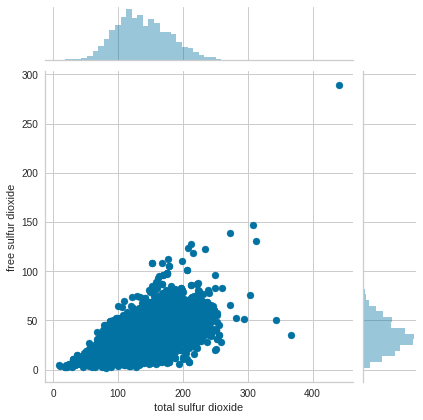

In [29]:
sns.jointplot(x="total sulfur dioxide", y="free sulfur dioxide", data=white_data);

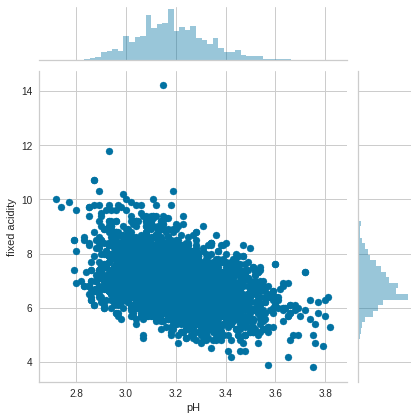

In [30]:
sns.jointplot(x="pH", y="fixed acidity", data=white_data);

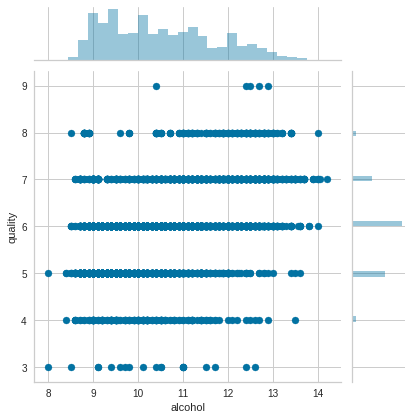

In [31]:
sns.jointplot(x="alcohol", y="quality",  data=white_data); 

### Vinho Tinto

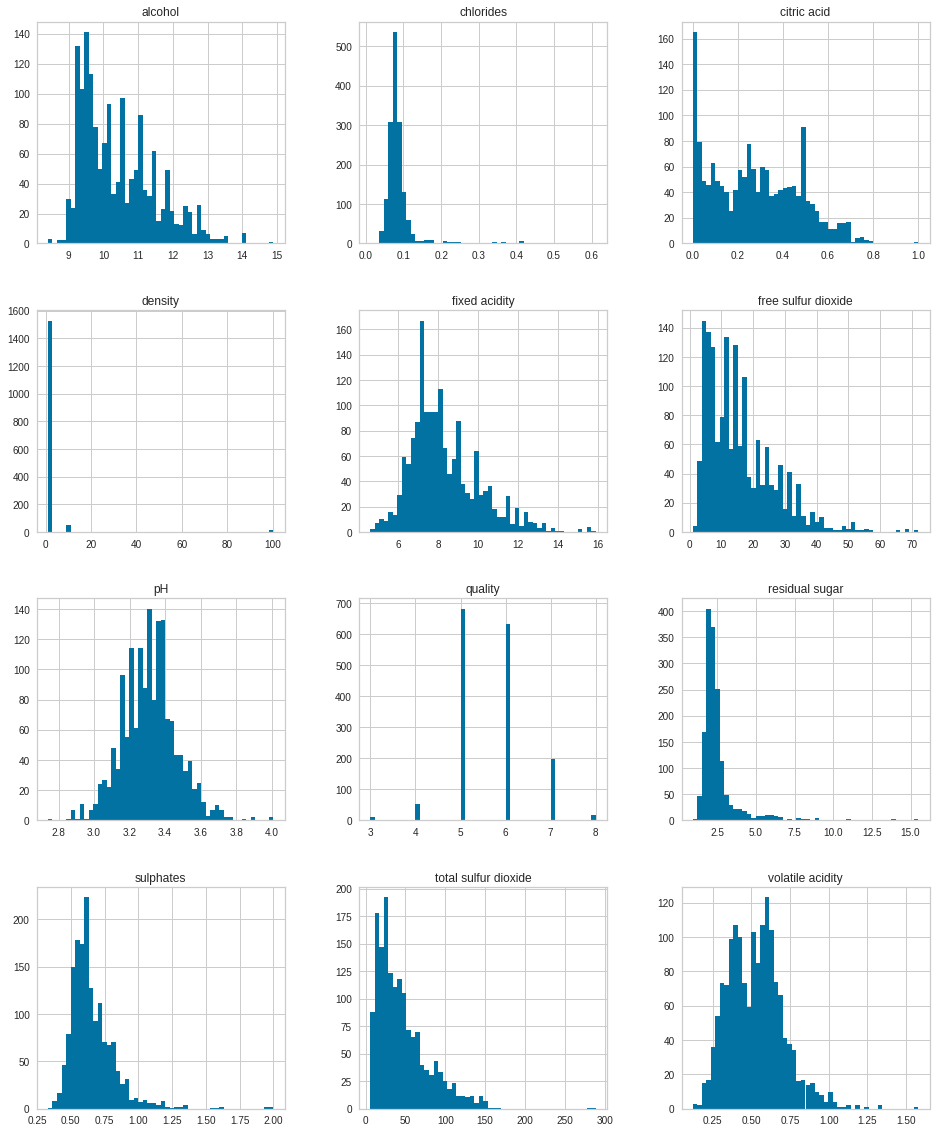

In [32]:
red_data.hist(figsize=(16, 20), bins=50);

In [33]:
corrR = red_data.corr()
corrR

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.256,0.672,0.118,0.093,-0.152,-0.110,0.262,-0.682,0.185,-0.059,0.126
volatile acidity,-0.256,1.000,-0.553,-0.001,0.062,-0.012,0.074,0.005,0.235,-0.261,-0.201,-0.392
citric acid,0.672,-0.553,1.000,0.145,0.203,-0.059,0.038,0.088,-0.542,0.314,0.112,0.228
residual sugar,0.118,-0.001,0.145,1.000,0.056,0.187,0.201,0.300,-0.087,0.006,0.044,0.014
chlorides,0.093,0.062,0.203,0.056,1.000,0.006,0.049,0.074,-0.265,0.373,-0.220,-0.128
free sulfur dioxide,-0.152,-0.012,-0.059,0.187,0.006,1.000,0.668,0.094,0.069,0.052,-0.071,-0.051
total sulfur dioxide,-0.110,0.074,0.038,0.201,0.049,0.668,1.000,0.039,-0.069,0.043,-0.209,-0.188
density,0.262,0.005,0.088,0.300,0.074,0.094,0.039,1.000,-0.125,0.048,-0.061,-0.026
pH,-0.682,0.235,-0.542,-0.087,-0.265,0.069,-0.069,-0.125,1.000,-0.200,0.204,-0.059
sulphates,0.185,-0.261,0.314,0.006,0.373,0.052,0.043,0.048,-0.200,1.000,0.091,0.251


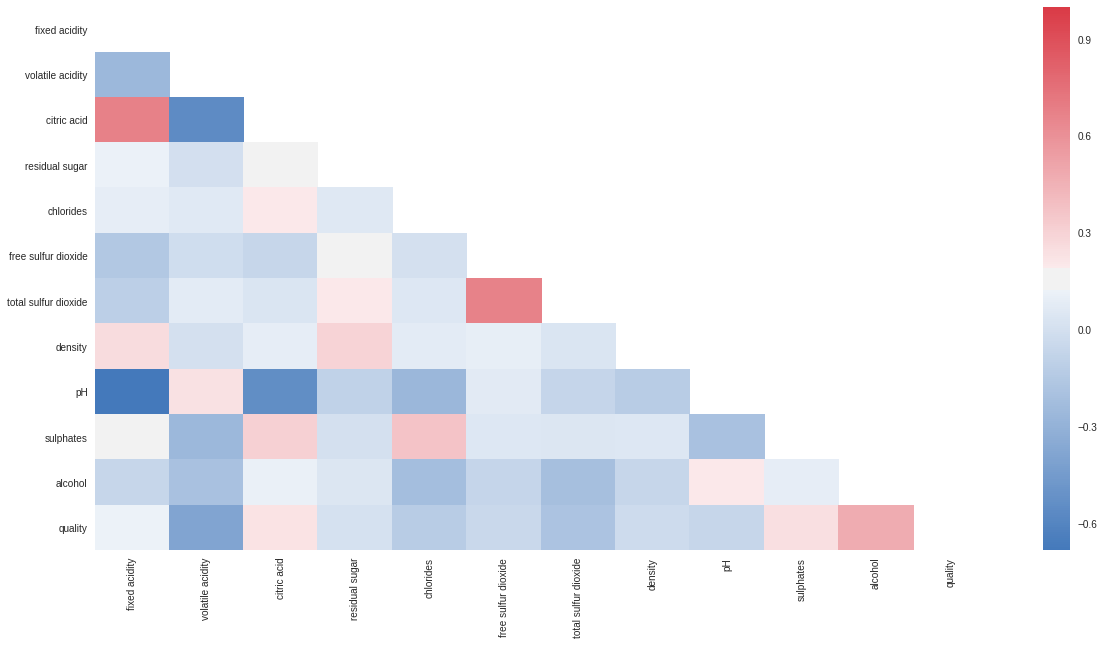

In [34]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)

mask = np.zeros_like(corrR, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corrR, cmap=cmap, mask = mask);

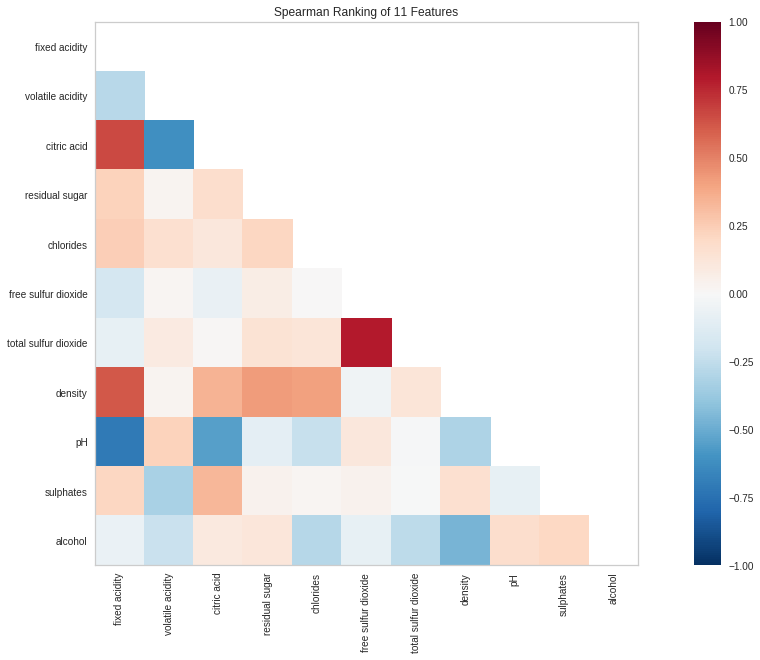

In [35]:
X = red_data[features]
y = red_data['quality']


vis = yft.Rank2D(features=features, algorithm='spearman')

vis.fit(X, y)
vis.transform(X)
vis.poof()

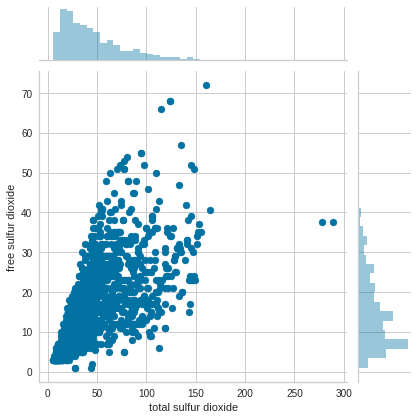

In [36]:
sns.jointplot(x="total sulfur dioxide", y="free sulfur dioxide", data=red_data);

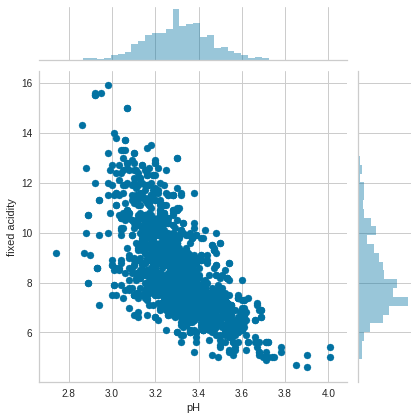

In [37]:
sns.jointplot(x="pH", y="fixed acidity",  data=red_data);

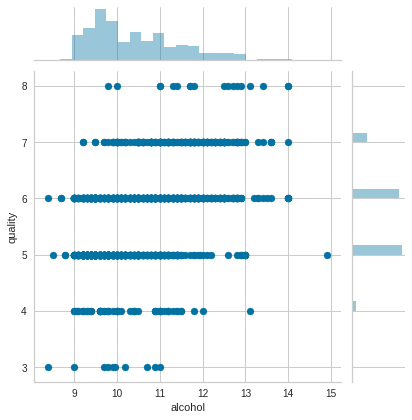

In [38]:
sns.jointplot(x="alcohol", y="quality",  data=red_data);

Como a distribuição dos dados muda sensivelmente com o tipo de vinho, como pro exemplo, a influência do ácido cítrico, talvez seja interessante modelá-los separadamente

### Análise de componentes principais

Por curiosidade, vamos realizar um PCA para tentar entender como as variáveis estão espalhadas no espaço

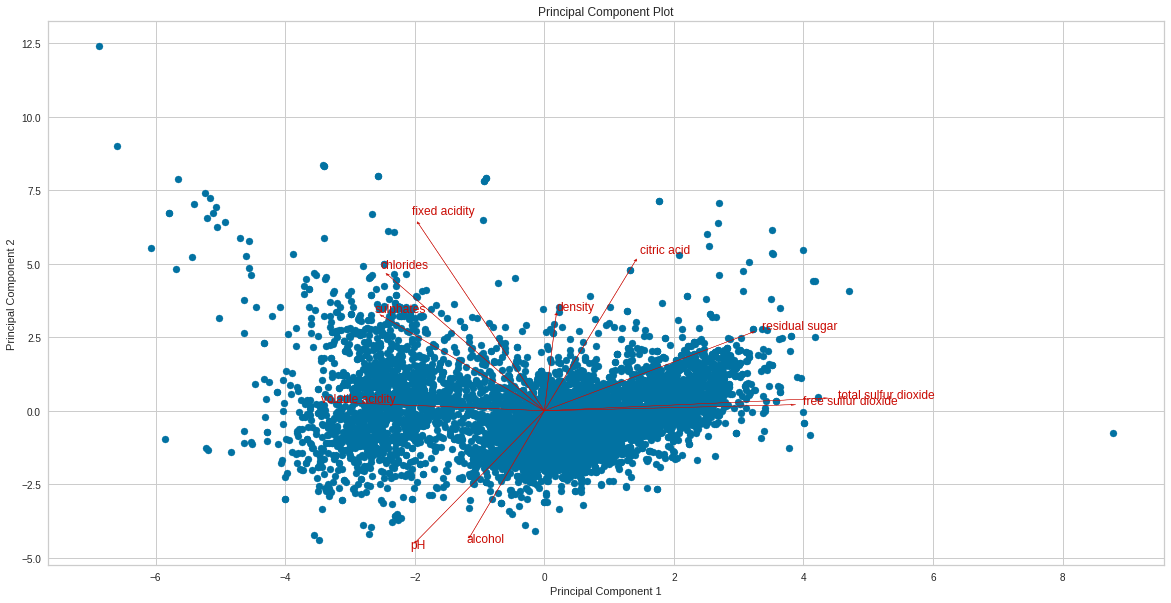

In [39]:
X = data[features]
y = data['quality']

vis = yft.PCADecomposition(scale=True, proj_features=True)
vis.fit_transform(X, y)
vis.poof()

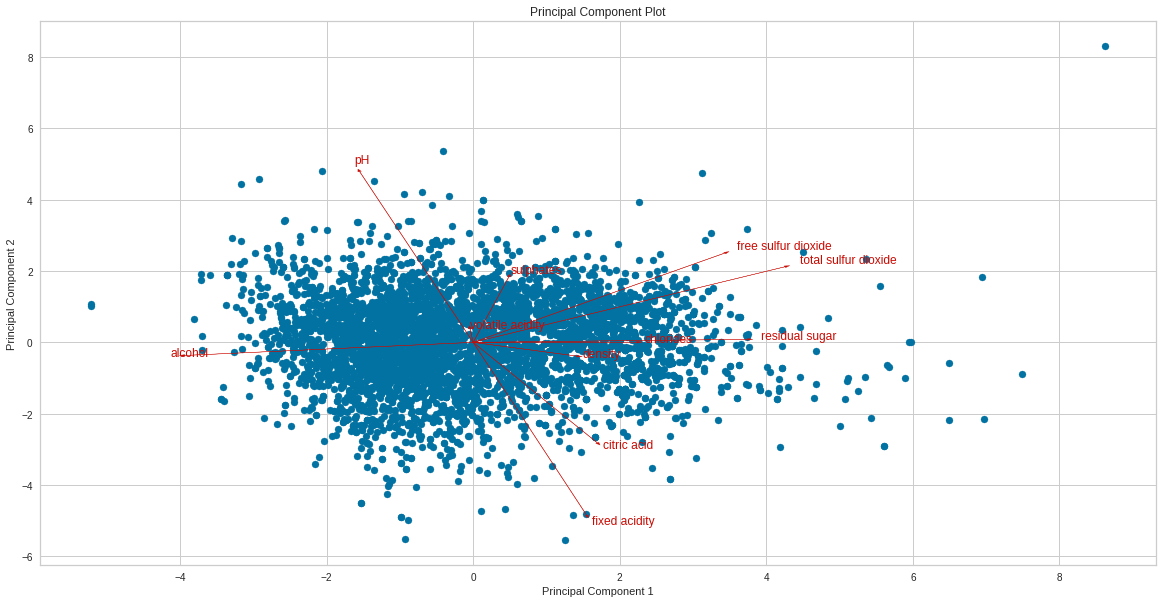

In [40]:
X = white_data[features]
y = white_data['quality']

vis = yft.PCADecomposition(scale=True, proj_features=True)
vis.fit_transform(X, y)
vis.poof()

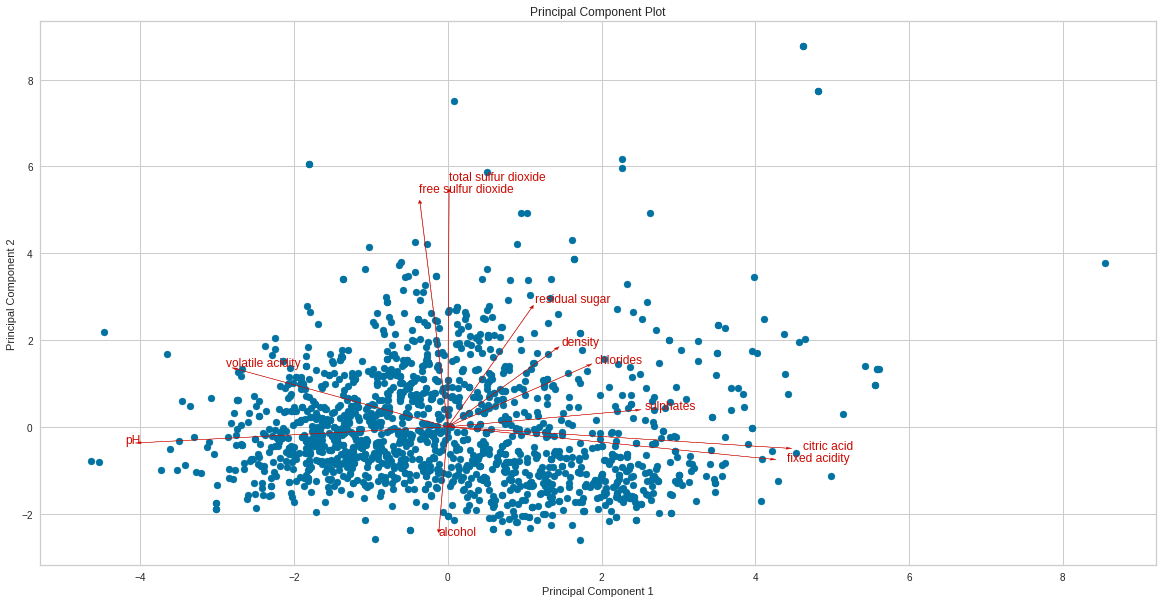

In [41]:
X = red_data[features]
y = red_data['quality']

vis = yft.PCADecomposition(scale=True, proj_features=True)
vis.fit_transform(X, y)
vis.poof()